# PV Solar Power Plant: 
Photo Voltaic Solar Power has emerged as the best source of green energy in recent past in a country like India which gets a good amount of solar insolation. With the continuous development of efficient PV modules, Battery storage and Smart Grid etc. Power Generation through PV Solar Plant has gained the momentum further and has a very promising future.   

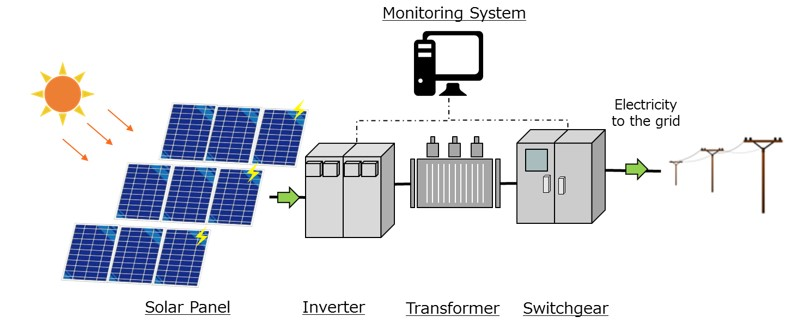

The above picture shows a typical structure of a solar power plant. 
Sunlight falls on PV modules, generates DC Power which is fed to the Inverters (through some Junction Box and String Monitoring Box), Inverters convert DC Power to AC Power, AC Power is stepped up through Transformers to match Grid Voltage and finally fed to the Grid through some Switchgear. 

### The Challanges - 
1. Unlike conventional coal or gas based power plants, Solar Power Plants output are available during day time only and highly variable depending upon the availability of Sunlight.
2. Power generated has to be consumed instantly in the absence of a power storage (Battery storage is still emerging....)
3. Spread over a large area, should be shadow free. 
4. Regular cleaning of PV modules and physical fault detection in the field side.

We have at hand solar power generation data and weather data of two plants. Let's explore the given data, draw some insights, try to meet our challenges and predict/forecast the plant output to the extent possible which can be used for a better Grid Management/Stability. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 


In [ ]:
p1gd = pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv')
p2gd = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')
p1wd = pd.read_csv('../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')
p2wd = pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')

## Plant-1 and Plant-2 data
We assume that each "SOURCE_KEY" is the Inverter or Power Conditioning Unit in Generation_Data and "SOURCE_KEY" in Weather_Sensor_Data is the Weather Monitoring Unit which is located at an optimal place in the Solar Power plants. 

Generation and Weather Sensor data are recorded at a regular interval of 15 Minutes. 


In [ ]:
#p1gd.tail(10)
p1gd.head()
 

In [ ]:
p2gd.head()

In [ ]:
p1wd.head()


In [ ]:
p2wd.head()

### Plant-1 

#### Generation Data
* It seems AC Power and DC Power are not in the same Unit of Power. Because Generally the Inverter efficiency (ACPower/DC Power) is more than 95%, which is not the case here.  

#### Weather Data
* Ambient temperature varies between 20.4 to 35.3 deg C. 
* Module temperature varies between 18 to 65.5 deg C.
* Maximum Irradiation is 1.22 kWhr/Sq Mtr

In [ ]:
#p1gd.shape
#p1wd.shape
#p2gd.shape
p2wd.shape

In [ ]:
p1gd.describe()

In [ ]:
p1wd.describe()

### Plant-2

#### Generation Data
* Minimum DC and AC Power generation is 0kW when there is no Sun Light/Irradiation. 
* Maximum DC Power generation is 1420.93 kW associated with 1 SOURCE_KEY/Inverter. 
* Maximum Daily Yield per Inverter is 9873 kWHr. 

#### Weather Data
* Ambient temperature varies between 20.9 to 39.2 deg C. 
* Module temperature varies between 20.3 to 66.6 deg C.
* Maximum Irradiation is 1.098 kWhr/Sq Mtr

In [ ]:
p2gd.describe()

In [ ]:
p2wd.describe()

In [ ]:
p1gd.info()

In [ ]:
p1wd.info()

In [ ]:
p2gd.info()

In [ ]:
p2wd.info()

### Missing Value Check

There is no missing value in the datasets.

In [ ]:
p1wd.isnull().sum()

#There is no missing value in Plant-1 weather data.

In [ ]:
p1gd.isnull().sum()

#There is no missing value in Plant-1 generation data

In [ ]:
p2wd.isnull().sum()

#There is no missing value in Plant-2 weather data.

In [ ]:
p2gd.isnull().sum()

#There is no missing value in Plant-2 weather data.

# Let us do further analysis of Plant-2 Data only:

## Insights-Plant Equipment   
* There are 22 Inverters in Plant-2
* There is only one Weather Monitoring Unit in Plant-2
* The datasets contain the data of plant-2 only


In [ ]:
p2gd['SOURCE_KEY'].unique()


In [ ]:
len(p2gd['SOURCE_KEY'].unique())

In [ ]:
p2wd['SOURCE_KEY'].unique()

In [ ]:
p2gd['PLANT_ID'].unique()

In [ ]:
p2wd['PLANT_ID'].unique()

## Insights-Power/Energy Generation

### Daily/Total Energy Yield
* There is some unusual observation in the data as DAILY_YIELD should start increasing from Sunrise till Sunset and remain constatnt till midnight. Again reset to zero after midnight. Night time yield could be due to Battery Storage which is a matter of real time study of the plant. However, for the current project we will continue our analysis with the same data. 

* Total Energy Yield from the plant-2 during entire 34 days given period is approx. 4000,000 kWHr = 4 Mega Units of electricity 



In [ ]:
#Converting DATE_TIME into datetime format

p2gd['DATE_TIME'] = pd.to_datetime(p2gd['DATE_TIME'],format = '%Y-%m-%d %H:%M')
p2wd['DATE_TIME'] = pd.to_datetime(p2wd['DATE_TIME'],format = '%Y-%m-%d %H:%M')

In [ ]:
# Splitting date and time in separate columns 

p2gd['DATE'] = p2gd['DATE_TIME'].apply(lambda x:x.date())
p2gd['TIME'] = p2gd['DATE_TIME'].apply(lambda x:x.time())
p2wd['DATE'] = p2wd['DATE_TIME'].apply(lambda x:x.date())
p2wd['TIME'] = p2wd['DATE_TIME'].apply(lambda x:x.time())

In [ ]:
p2gd.tail()

In [ ]:
#Let us check DAILY_YIELD data with time of the day.
p2gd_time_grp = p2gd.groupby(['TIME']).sum()
p2gd_time_grp

In [ ]:

p2gd_time_grp['DAILY_YIELD'].plot(figsize=(20,5))
plt.title('Total 34 day Plant-2 Yield with time of the day')
plt.ylabel('Yield in kWHr')

### DC power generation from Solar Panels to particular Inverters - 
From the DC Power Generation plot it is clear that substantially low DC Power is coming to Inverters "Et9kgGMDl729KT4", "LYwnQax7tkwH5Cb", "Quc1TzYxW2pYoWX" and "rrq4fwE8jgrTyWY"

Hence,Solar Modules connected to these Inverters are recommended to be cleaned, observed for any shadow coming from nearby objects.
Also, these Solar Modules and/or Strings are to be checked for any fault. 


In [ ]:

p2_dc_pwr = p2gd.copy()
p2_dc_pwr = p2_dc_pwr.groupby(['TIME','SOURCE_KEY'])['DC_POWER'].mean().unstack()

fig,ax=plt.subplots(ncols=3,nrows=1,dpi=200,figsize=(20,5))
ax[0].set_title('DC Power Generation to 1st 7 Inverters')
ax[1].set_title('DC Power Generation to next 8 Inverters')
ax[2].set_title('DC Power Generation to last 7 Inverters')
ax[0].set_ylabel('DC POWER in kW')


p2_dc_pwr.iloc[:,0:7].plot(ax=ax[0],linewidth = 5)
p2_dc_pwr.iloc[:,7:15].plot(ax=ax[1],linewidth = 5)
p2_dc_pwr.iloc[:,15:22].plot(ax=ax[2],linewidth = 5)

### Inverter Efficiency 
* Inverter Efficiency plot shows that efficiency of inverters lies between 97.76% to 97.92% with an average efficiency of 97.80%
* Inverters are operating with a satisfactory level of efficiency.



In [ ]:

p2gd_Inv_grp = p2gd.groupby(['SOURCE_KEY']).mean()
p2gd_Inv_grp['Inv_Efficiency']= p2gd_Inv_grp['AC_POWER']*100/p2gd_Inv_grp['DC_POWER']

p2gd_Inv_grp['Inv_Efficiency'].plot(figsize=(15,5), style='o--')
plt.axhline(p2gd_Inv_grp['Inv_Efficiency'].mean(),linestyle='--',color='green')
plt.title('Inverter Efficiency Plot', size=20)
plt.ylabel('% Efficiency')

### Inverters Yield
Let's check the Total Yield of each Inverter- 
Inverter Nos. 1,4,5,7-9,12,14,18-22 have significantly less Total Yield (Energy Output) compared to other inverters. 
This may be because of the following reasons-

1. These Inverters may have started their operation at a later date
1. Faulty Solar Modules or Circuits including inverters and/or dusty Solar Module surfaces
1. Shadow on Solar Modules from nearby objects or structures. 

Note that We have already seen in DC Power Plot that Inverters 4,12 and 19 are receiving less DC Power.   



In [ ]:


p2gd_Inv_tyld = p2gd.groupby(['SOURCE_KEY']).max()

p2gd_Inv_tyld['TOTAL_YIELD'].plot(figsize=(15,5), style='o--')
plt.axhline(p2gd_Inv_tyld['TOTAL_YIELD'].mean(),linestyle='--',color='green')
plt.title('Total Yield Plot', size=20)
plt.ylabel('Total Yield till 17th June 2020')

### Checking the AC POWER Output of the entire Solar Power Plant (Plant-2)
* Maximum Power evacuation from Plant-2 has touched upto 25-26 MW.
* AC Power output from the plant is available during day time only as expected due to availability of Sunlight.
* Fluctuation in power during day hours could be due to cloud/ other shadow/ Faulty Solar Panels or other equipments. 
* Some cutoff is observed in the AC Power output e.g. on 19.05.2020. This could be due to some fault in evacuation side and Grid disconnection.


In [ ]:


p2_ac_pwr = p2gd.copy()
p2_ac_pwr = p2_ac_pwr.groupby(['TIME','DATE'])['AC_POWER'].sum().unstack()

fig,ax=plt.subplots(ncols=3,nrows=3,dpi=200,figsize=(20,20))
ax[0,0].set_title('Plant-2 Output Day-1 to 4')
ax[0,1].set_title('Plant-2 Output Day-5 to 8')
ax[0,2].set_title('Plant-2 Output Day-9 to 12')
ax[1,0].set_title('Plant-2 Output Day-13 to 16')
ax[1,1].set_title('Plant-2 Output Day-17 to 20')
ax[1,2].set_title('Plant-2 Output Day-21 to 24')
ax[2,0].set_title('Plant-2 Output Day-25 to 28')
ax[2,1].set_title('Plant-2 Output Day-29 to 32')
ax[2,2].set_title('Plant-2 Output Day-33 to 34')

ax[0,0].set_ylabel('AC Power Output in kW')
ax[1,0].set_ylabel('AC Power Output in kW')
ax[2,0].set_ylabel('AC Power Output in kW')
    
p2_ac_pwr.iloc[:,0:4].plot(ax=ax[0,0], linewidth = 2)
p2_ac_pwr.iloc[:,4:8].plot(ax=ax[0,1], linewidth = 2)
p2_ac_pwr.iloc[:,8:12].plot(ax=ax[0,2], linewidth = 2)
p2_ac_pwr.iloc[:,12:16].plot(ax=ax[1,0], linewidth = 2)
p2_ac_pwr.iloc[:,16:20].plot(ax=ax[1,1], linewidth = 2)
p2_ac_pwr.iloc[:,20:24].plot(ax=ax[1,2], linewidth = 2)
p2_ac_pwr.iloc[:,24:28].plot(ax=ax[2,0], linewidth = 2)
p2_ac_pwr.iloc[:,28:32].plot(ax=ax[2,1], linewidth = 2)
p2_ac_pwr.iloc[:,32:].plot(ax=ax[2,2], linewidth = 2)


## Let us Merge the Generation and Weather data
DC_POWER, AC_POWER and DAILY_YIELD in merged_data are for the entire plant (Plant-2)

In [ ]:

p2gd_DT = p2gd.groupby(['DATE_TIME'],as_index=False).sum()
p2gd_DT

In [ ]:
#Retaining relevant data
p2gd_DT_Select = p2gd_DT[['DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD']]
p2gd_DT_Select

In [ ]:
#Retaining relevant data
p2wd_drp = p2wd.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)

In [ ]:
p2wd_drp

In [ ]:

merged_data = pd.merge(p2gd_DT_Select, p2wd_drp, how='inner', on='DATE_TIME')

In [ ]:
merged_data.iloc[25:35]

### Some Insights from Generation and Weather data combined 
Each point in the pair plot corresponds to a particular Date and Time- 
* DC_POWER and AC_POWER are perfactly linearly related. 
* DC_Power and AC_Power generated has a direct relationship with Irradiation. Few points where Irradiation is high but DC_Power/AC_Power is very less or even zero, may be due to some Solar Module, SMB, Inverter etc failure or fault in the circuit including fault in power evacuation side.
* Generally Module temperature increases with the increase in Ambient temperature and Irradiation. 

In [ ]:

sns.pairplot(merged_data[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']])

### Effect of Time of the Day

We can observe from the plots how on an average Irradiation, Ambient Temperature, Module Temperature and DC Power first increases and then decreases from sunrise to sunset. 

We can also observe that DC Power (and hence the AC Power output of the plant) attains a maximum value remains almost constant for sometime during peak Irradiation and then decreases. This is because

In [ ]:

merged_data_Irr = merged_data.copy()
merged_data_Irr_t = merged_data_Irr.groupby(['TIME']).mean()

fig,ax=plt.subplots(ncols=2,nrows=2,dpi=200,figsize=(15,5))
merged_data_Irr_t['IRRADIATION'].plot(ax=ax[0,0])
merged_data_Irr_t['AMBIENT_TEMPERATURE'].plot(ax=ax[0,1])
merged_data_Irr_t['MODULE_TEMPERATURE'].plot(ax=ax[1,0])
merged_data_Irr_t['DC_POWER'].plot(ax=ax[1,1])

ax[0,0].set_ylabel('IRRADIATION')
ax[0,1].set_ylabel('AMBIENT TEMPERATURE')
ax[1,0].set_ylabel('MODULE TEMPERATURE')
ax[1,1].set_ylabel('DC POWER')

### Let us observe the correlation among variables - 
* As expected DC_POWER and AC_POWER are directly correlated. 
* DC Power generation is highly positively correlated with Irradiation, Module Temperature and Ambient Temperature.
* However, it should not be concluded here that DC Power generation increases with increase in Module Temperature as we know the fact that Solar Module efficiency decreases with increase in temperature. This anamoly is because of one more fact that Module Temperature and Ambient Temperature increases with the increase in Irradiation which is the cause of power generation from Solar Photovoltaic Modules.
* DAILY_YIELD is slightly negatively correlated with DC_POWER and IRRADIATION which not as per our expectation. This peculiar behaviour of DAILY_YIELD has already been discussed in above section.


In [ ]:

merged_data_num = merged_data[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
corr = merged_data_num.corr()

fig_dims = (2, 2) 
sns.heatmap(round(corr,2), annot=True, mask=(np.triu(corr,+1)))

## Prediction/Forecast of AC Power Output of the Plant
For a given Solar Power Plant the AC Power output will depend on Solar Irradiation, Ambient Temperature and Module Temperature provided all equipments are in healthy condition. 
Using Time Series Forecast methods can certainly forecast the next few days AC Power output of the plant. However, it will be more accurate to predict the AC Power output using Weather forecast data from a reliable source and using Regression methods.    

### Predicting AC POWER using Regression:
Data for Regression-
AC Power generation of the plant will certainly depend on Irradiation, Ambient Temperature and Module Temperature. Howevere, to predict the AC Power we will have the Weather Forecast data (i.e. Irradiation and Ambient Temperature) only. 
Also, Module temperature is dependent on Ambient Temperature and Irradiation as is evident from Heatmap also.
Hence, we are using Irradiation and Ambient Temperature only to predict AC Power output of the plant.


In [ ]:

data_reg = merged_data[['AC_POWER','IRRADIATION','AMBIENT_TEMPERATURE']] 

In [ ]:

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split


In [ ]:
y= data_reg['AC_POWER']
X=data_reg[['IRRADIATION','AMBIENT_TEMPERATURE']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
pred_y_train = lm.predict(X_train)
pred_y_test = lm.predict(X_test)

In [ ]:
#plt.scatter(y_test, predictions)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#Model Evaluation on Training data

R2_train = r2_score(y_train, pred_y_train)
mse_train = mean_squared_error(y_train, pred_y_train)
print('R2 for Train dataset:', R2_train, '  '   'MSE for Train dataset:', mse_train)



In [ ]:
#Model Evaluation on Testing data

R2_test = r2_score(y_test, pred_y_test)
mse_test = mean_squared_error(y_test, pred_y_test)
print('R2 for Test dataset:', R2_test, '  '   'MSE for Test dataset:', mse_test)


### Linear Regression Model Validity and Interpretation 
R2 value of Train and Test Datasets are almost equal. Model is valid and approx. 83% of AC Power variation is explained by Irradiation and Ambient Temperature. 
AC Power generation is also dependent on Module surface cleanliness and faulty Modules/Inverters etc.

AC Power output is highly dependent on Irradition.
With 1 unit increase in Irradiation, AC Power output increases by approx 17.5MW
With 1 deg increase in Ambient Temperature AC Power output increases by 120 kW. 


In [ ]:

print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)

### Conclusion
Power Generation Data and Weather Sensor Data can be used to evaluate the performance of a Solar Power Plant, to detect faulty circuit or equipments / Modules and to identify the need of module cleaning etc.

Using the Weather forecast data (Irradiation and Ambient Temperature), AC Power output of the plant can be predicted with a good accuracy. This helps in an effective Grid Management and saves the society from an unwanted Voltage Fluctuation and Power outage.  